## Review steps

1. Data collection
2. Data preprocessing
3. train-test split
4. Choosing ml/dl model
5. Train model
6. Do prediction and evaluate the model

In [11]:
import numpy as np # linear algebra import pandas
from numpy import array
import pandas as pd
import math 
import seaborn as sns 
import datetime as dt 
from datetime import datetime
sns.set_style("whitegrid") 
from pandas.plotting import autocorrelation_plot 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot" )
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm

## Loading data

In [12]:
data= pd.read_csv("Yamaha.csv",delimiter=";")
data

,Date,Price,Open,High,Low,Volume,Change
0,04/01/2018,"4320,00","4210,00","4320,00","4205,00","1160000,0","0,03850"
1,05/01/2018,"4380,00","4340,00","4385,00","4315,00","942600,0","0,01390"
2,09/01/2018,"4465,00","4415,00","4470,00","4375,00","968700,0","0,01940"
3,10/01/2018,"4520,00","4470,00","4530,00","4465,00","764000,0","0,01230"
4,11/01/2018,"4540,00","4525,00","4545,00","4515,00","796800,0","0,00440"
...,...,...,...,...,...,...,...
1447,08/12/2023,"3216,00","3271,00","3271,00","3199,00","1440000,0","-0,01680"
1448,11/12/2023,"3216,00","3259,00","3269,00","3213,00","944400,0","0,00000"
1449,12/12/2023,"3176,00","3269,00","3271,00","3174,00","991400,0","-0,01240"
1450,13/12/2023,"3218,00","3190,00","3230,00","3190,00","1040000,0","0,01320"


## Data Exploration

In [13]:
# Check the data type of each value column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1452 non-null   object
 1   Price   1452 non-null   object
 2   Open    1452 non-null   object
 3   High    1452 non-null   object
 4   Low     1452 non-null   object
 5   Volume  1452 non-null   object
 6   Change  1452 non-null   object
dtypes: object(7)
memory usage: 79.5+ KB


In [14]:
# Reformat the date data type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')  # Ví dụ cho định dạng dd/mm/yyyy
data['Date']

0      2018-01-04
1      2018-01-05
2      2018-01-09
3      2018-01-10
4      2018-01-11
          ...    
1447   2023-12-08
1448   2023-12-11
1449   2023-12-12
1450   2023-12-13
1451   2023-12-14
Name: Date, Length: 1452, dtype: datetime64[ns]

In [15]:
# Clean data and cast data for calculation
data['Price'] = data['Price'].str.replace(',', '.').astype(float)
data['Open'] = data['Open'].str.replace(',', '.').astype(float)
data['High'] = data['High'].str.replace(',', '.').astype(float)
data['Low'] = data['Low'].str.replace(',', '.').astype(float)
data['Volume'] = data['Volume'].str.replace(',', '.').astype(float)
data['Change'] = data['Change'].str.replace(',', '.').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1452 non-null   datetime64[ns]
 1   Price   1452 non-null   float64       
 2   Open    1452 non-null   float64       
 3   High    1452 non-null   float64       
 4   Low     1452 non-null   float64       
 5   Volume  1452 non-null   float64       
 6   Change  1452 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 79.5 KB


In [16]:
# Gets descriptive statistical information about a DataFrame or a Series
data.describe()

,Date,Price,Open,High,Low,Volume,Change
count,1452,1452.000000,1452.000000,1452.000000,1452.000000,1.452000e+03,1452.000000
mean,2020-12-26 16:00:59.504132352,5342.451102,5344.658402,5400.580579,5283.276171,6.088632e+05,0.000012
min,2018-01-04 00:00:00,3142.000000,3190.000000,3205.000000,3133.000000,1.144000e+05,-0.145700
25%,2019-07-01 18:00:00,4938.750000,4940.000000,4990.000000,4890.000000,4.071750e+05,-0.011325
50%,2020-12-28 12:00:00,5315.000000,5320.000000,5370.000000,5260.000000,5.324000e+05,0.000000
75%,2022-06-24 18:00:00,5770.000000,5790.000000,5840.000000,5720.000000,7.116750e+05,0.010700
max,2023-12-14 00:00:00,7440.000000,7450.000000,7490.000000,7360.000000,3.140000e+06,0.126700
std,NaN,695.721143,694.041663,698.877570,688.962765,3.185040e+05,0.020299


## Data Visualization

In [17]:
# Reshape turns df into a NumPy array of size (-1, 1)
df=data['Price'].values
df = df.reshape(-1, 1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Perform data normalization according to the min-max scaling method
price_scaled=scaler.fit_transform(df) # Fit và transform the data
price_scaled

array([[0.27408097],
       [0.28804095],
       [0.30781759],
       ...,
       [0.00791066],
       [0.01768264],
       [0.        ]])

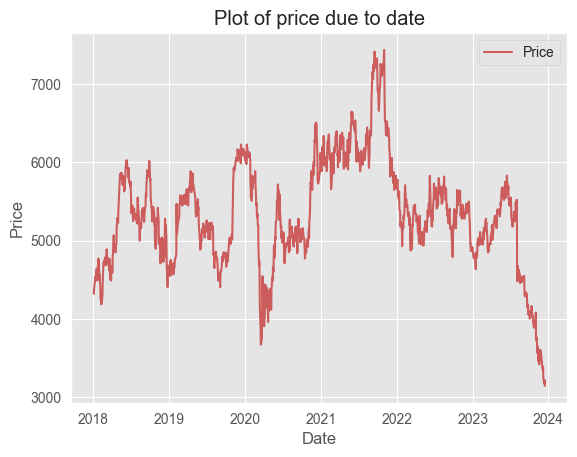

In [19]:
# Create plot
plt.figure(figure=(10,6))
plt.plot(data['Date'],data['Price'].values, label="Price", color="IndianRed")

# Adding title
plt.title("Plot of price due to date")

# Adding label
plt.xlabel("Date")
plt.ylabel("Price")

# Show the plot
plt.legend()
plt.show()

## Data Preprocessing

### Split data into training and testing set

In [20]:
def Train_test_split(sequence, n_steps, train_size, test_size):
    """Split data into training, test sets for a time series problem.

     Args:
         sequence: Input time series data.
         n_steps: Number of time steps to form a data sample.
         train_size: Size of the training set.
         test_size: Size of the test set.

     Returns:
         X_train, y_train: Training set (feature data and labels).
         X_test, y_test: Test set (feature data and labels).
         X_valid, y_valid: Validation set (feature data and labels).
    """

    data_train = sequence[:train_size]  # Extract the training data
    data_test = sequence[train_size:train_size+test_size]  # Extract the testing data

    X_train, X_test, y_train, y_test = [], [], [], []  # Initialize empty lists

    # Create data samples and corresponding labels for each set
    for i in range(len(data_train) - n_steps):
        X_train.append(data_train[i:i+n_steps])  # Add data samples to X_train
        y_train.append(data_train[i+n_steps])  # Add data samples to y_train

    for i in range(len(data_test) - n_steps):
        X_test.append(data_test[i:i+n_steps])
        y_test.append(data_test[i+n_steps])


    return array(X_train), array(X_test), array(y_train), array(y_test),  # Return into NumPy arrays


## Proposed model

### CNN+GRU

In [21]:
from keras.models import Sequential
from keras.utils import set_random_seed
from keras.callbacks import EarlyStopping
from keras.layers import GRU, Dense, ConvLSTM2D, ConvLSTM1D, Dropout,Conv2D, TimeDistributed, Conv1D, MaxPooling1D, Flatten, RepeatVector, MaxPooling2D, MaxPooling3D, BatchNormalization
from keras.optimizers import Adam

def CNN_GRU_model(X_train, y_train, X_test, y_test, loss='mse'):
    model = Sequential()

    # Convolutional layer for spatial feature extraction
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2)) # Downsample features

    # GRU layer for sequential processing
    model.add(GRU(200, activation='relu', return_sequences=True))  # Use GRU 

    # Dense layers for final output
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

    # Compile the model with the desired optimizer and loss
    model.compile(optimizer='adam', loss=loss)

    # Train the model with early stopping
    callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode='min')
    model.fit(X_train, y_train, epochs=300, verbose=1, validation_data=(X_test, y_test), callbacks=[callback])

    return model

In [28]:
# Evaluate model
def Eval_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_inverted = scaler.inverse_transform(y_pred.reshape(y_pred.shape[0],-1))
    y_test_inverted = scaler.inverse_transform(y_test.reshape(y_test.shape[0],-1))
    rmse = round(mean_squared_error(y_test_inverted, y_pred_inverted, squared=False),1)
    mape = round(mean_absolute_percentage_error(y_test_inverted, y_pred_inverted)*100,2)
    mae = round(mean_absolute_error(y_test_inverted, y_pred_inverted),1)
    hl= mean_squared_error(y_test, y_pred, multioutput='raw_values')
    return y_pred_inverted, rmse, mape, mae, hl

## Training and testing model

#### Train 60% - Test 40%

In [23]:
train_size = int(0.6*len(price_scaled))
test_size = int(0.4*len(price_scaled))
time_step = 100
X_train, X_test, y_train, y_test = Train_test_split(price_scaled, n_steps=time_step, train_size=train_size, test_size=test_size)

In [24]:
n_seq = 2
X_train = X_train.reshape(X_train.shape[0], n_seq, time_step//n_seq, 1)
X_test = X_test.reshape(X_test.shape[0], n_seq, time_step//n_seq, 1)

In [25]:
# Check the size of the training data set
# This information is important for determining the number of parameters needed for the machine learning model
X_train.shape

(771, 2, 50, 1)

In [26]:
model = CNN_GRU_model(X_train, y_train, X_test, y_test)

Epoch 1/300
25/25 [==============================] - 1s 6ms/step - loss: 0.0492 - val_loss: 0.0216
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.0155
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 4/300
25/25 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0089
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0070
Epoch 6/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 7/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0081
Epoch 8/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0134
Epoch 9/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.0071
Epoch 10/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0072


In [29]:
y_pred_test, rmse, mape, mae, hl = Eval_model(model, X_test, y_test)
print(f"RMSE score of the model: {rmse}")
print(f"MAPE score of the model: {mape}%")
print(f"MAE score of the model: {mae}")
print(f"Huber loss of the model: {hl}")

15/15 [==============================] - 0s 2ms/step
RMSE score of the model: 358.5
MAPE score of the model: 6.1%
MAE score of the model: 284.7
Huber loss of the model: [0.00695713]


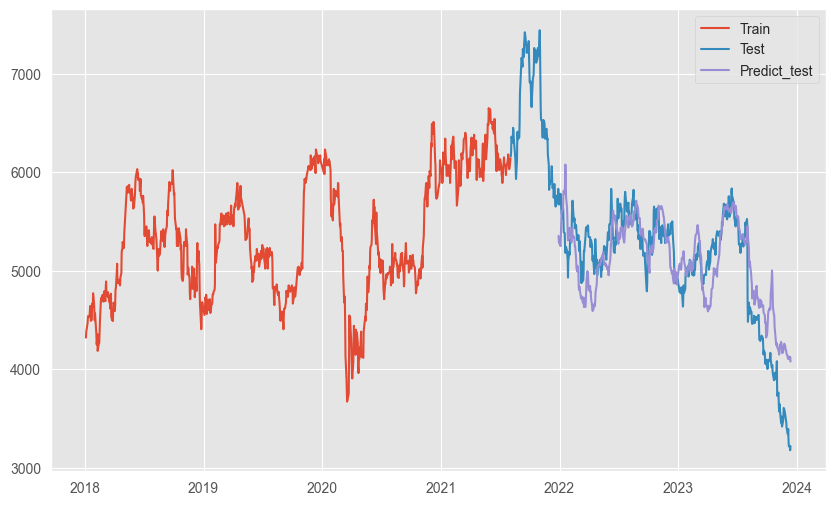

In [19]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'][:train_size], df[:train_size].flatten(), label = "Train")
plt.plot(data['Date'][train_size:train_size+test_size], df[train_size:train_size+test_size].flatten(), label = "Test")
plt.plot(data['Date'][train_size+time_step:train_size+test_size], y_pred_test, label = "Predict_test")
plt.legend()
plt.show()

## Predict

In [20]:
y_pred_30days = []
time_30days = pd.Series(pd.date_range(data['Date'][-1:].values[0], periods=30, freq='D'))
temp_input = price_scaled[-time_step:]

In [21]:
for i in tqdm(range(30)):
    pred_next_day = model.predict(temp_input[i:i+time_step].reshape(1,n_seq,time_step//n_seq,1), verbose=0)
    y_pred_30days.append(scaler.inverse_transform(pred_next_day[0].reshape(1, -1))[0][0])
    temp_input = np.append(temp_input, pred_next_day)

100%|███████████████████████████████████████████| 30/30 [00:00<00:00, 30.32it/s]


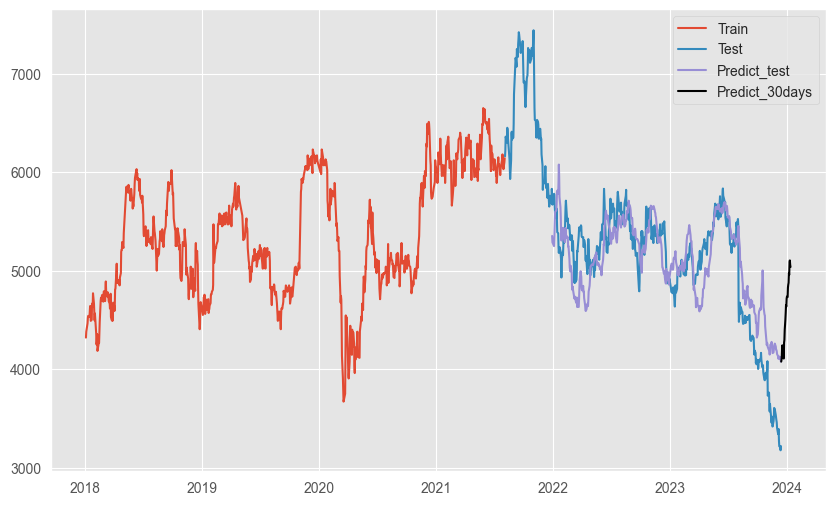

In [22]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'][:train_size], df[:train_size].flatten(), label = "Train")
plt.plot(data['Date'][train_size:train_size+test_size], df[train_size:train_size+test_size].flatten(), label = "Test")
plt.plot(data['Date'][train_size+time_step:train_size+test_size], y_pred_test, label = "Predict_test")
plt.plot(time_30days, y_pred_30days, label = "Predict_30days", color='black')
plt.legend()
plt.show()


**Conclusions:**

**Model performance:**
- The model can predict values relatively accurately. The values of RMSE, MAPE, and MAE are all within acceptable ranges for continuous value prediction tasks.
- The model performs best with a train/test ratio of 6-4, achieving the lowest RMSE (344.2), MAPE (5.88%), and MAE (275.4) among the tested ratios.
- The model's performance degrades as the train/test ratio increases, suggesting that more training data leads to better results.